In [1]:
%pip install seaborn
%pip install matplotlib
%pip install pandas
%pip install scikit-learn
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv('train.csv', sep=",")
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [4]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 12)

In [6]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

## Data preparation and cleaning

In [7]:
df.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [8]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [9]:
print("Amount of duplicated values:",df.duplicated().sum())

Amount of duplicated values: 0


In [10]:
df['churn'].value_counts()
#data is imbalanced as almost 80% of people have not churned their account.

churn
0    7963
1    2037
Name: count, dtype: int64

## Discrete data processing and visualisation

In [70]:
def my_autopct(pct):
    return ('%1.1f%%' % pct) if pct > 5 else ''

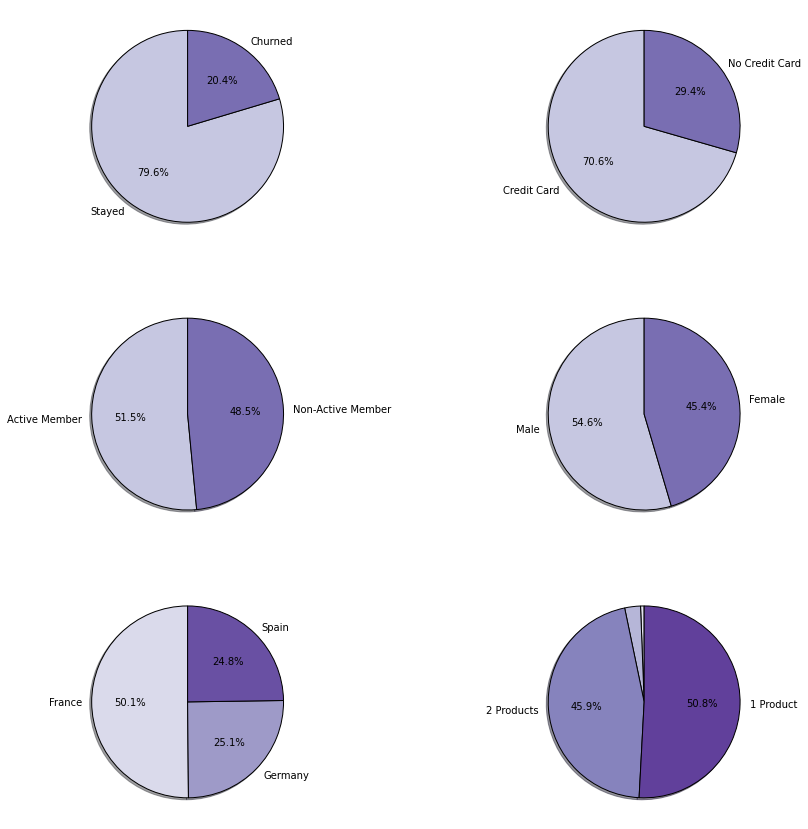

In [73]:
mycolors = sns.color_palette("Purples", 2)

plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
amounts = [df.churn[df['churn']==0].count(), df.churn[df['churn']==1].count()]
plt.pie(amounts, labels=("Stayed", "Churned"), shadow=True, startangle=90, colors=mycolors, autopct='%1.1f%%', wedgeprops={"edgecolor":"k",'linewidth': 1, 'antialiased': True})

plt.subplot(3,2,2)
amounts = [df.country[df['credit_card']==1].count(), df.churn[df['credit_card']==0].count()]
plt.pie(amounts, labels=("Credit Card", "No Credit Card"), shadow=True, startangle=90, colors=mycolors, autopct='%1.1f%%', wedgeprops={"edgecolor":"k",'linewidth': 1, 'antialiased': True})

plt.subplot(3,2,3)
amounts = [df.churn[df['active_member']==1].count(), df.churn[df['active_member']==0].count()]
plt.pie(amounts, labels=("Active Member", "Non-Active Member"), shadow=True, startangle=90, colors=mycolors, autopct='%1.1f%%', wedgeprops={"edgecolor":"k",'linewidth': 1, 'antialiased': True})

plt.subplot(3,2,4)
amounts = [df.churn[df['gender']=="Male"].count(), df.churn[df['gender']=="Female"].count()]
plt.pie(amounts, labels=("Male", "Female"), shadow=True, startangle=90, colors=mycolors, autopct='%1.1f%%', wedgeprops={"edgecolor":"k",'linewidth': 1, 'antialiased': True})

plt.subplot(3,2,5)
amounts = [df.churn[df['country']=="France"].count(), df.churn[df['country']=="Germany"].count(), df.churn[df['country']=="Spain"].count()]
plt.pie(amounts, labels=("France", "Germany", "Spain"), shadow=True, startangle=90, colors=sns.color_palette("Purples", 3), autopct='%1.1f%%', wedgeprops={"edgecolor":"k",'linewidth': 1, 'antialiased': True})

plt.subplot(3,2,6)
amounts = [df.churn[df['products_number']==4].count(), df.churn[df['products_number']==3].count(), df.churn[df['products_number']==2].count(), df.churn[df['products_number']==1].count()]
plt.pie(amounts, labels=("", "", "2 Products", "1 Product"), shadow=True, startangle=90, colors=sns.color_palette("Purples", 4), autopct=my_autopct, wedgeprops={"edgecolor":"k",'linewidth': 1, 'antialiased': True})

plt.show()

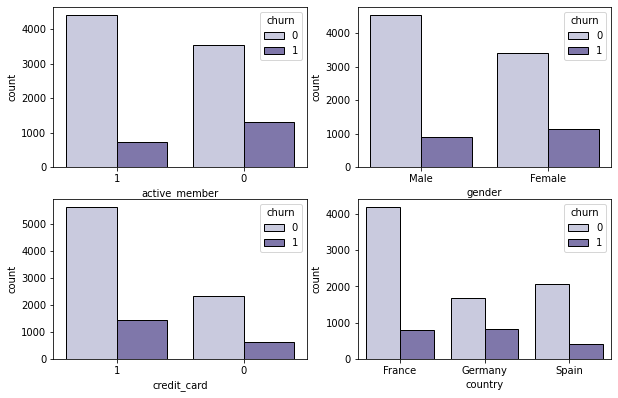

In [88]:
plt.figure(figsize=(10, 10))
plt.subplot(3,2,1)
plt.xlabel('active_member', fontsize=10)
plt.ylabel('count', fontsize=10)
count_plt = sns.countplot(data=df, x='active_member', hue='churn', order=df['active_member'].value_counts().index, palette=mycolors , edgecolor="black")

plt.subplot(3,2,2)
plt.xlabel('gender', fontsize=10)
plt.ylabel('count', fontsize=10)
count_plt = sns.countplot(data=df, x='gender', hue='churn', order=df['gender'].value_counts().index, palette=mycolors, edgecolor="black")

plt.subplot(3,2,3)
plt.xlabel('credit_card', fontsize=10)
plt.ylabel('count', fontsize=10)
count_plt = sns.countplot(data=df, x='credit_card', hue='churn', order=df['credit_card'].value_counts().index, palette=mycolors, edgecolor="black")

plt.subplot(3,2,4)
plt.xlabel('country', fontsize=10)
plt.ylabel('count', fontsize=10)
count_plt = sns.countplot(data=df, x='country', hue='churn', order=df['country'].value_counts().index, palette=mycolors, edgecolor="black")

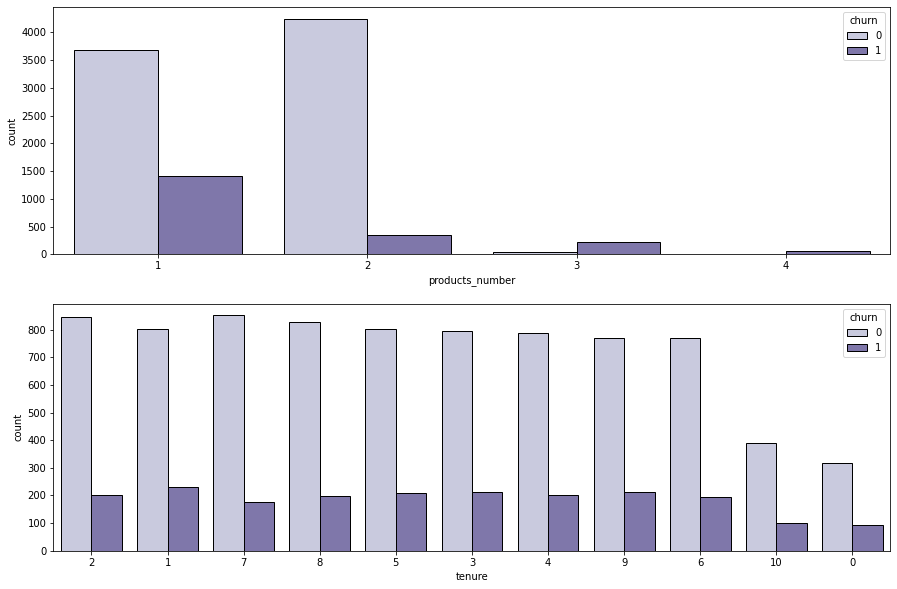

In [87]:
plt.figure(figsize=(15, 10))

plt.subplot(2,1,1)
plt.xlabel('products_number', fontsize=10)
plt.ylabel('count', fontsize=10)
count_plt = sns.countplot(data=df, x='products_number', hue='churn', order=df['products_number'].value_counts().index, palette=mycolors, edgecolor="black")

plt.subplot(2,1,2)
plt.xlabel('tenure', fontsize=10)
plt.ylabel('count', fontsize=10)
count_plt = sns.countplot(data=df, x='tenure', hue='churn', order=df['tenure'].value_counts().index, palette=mycolors, edgecolor="black")

From the above bar graphs we can see that:
- Germany has a relativley high churn rate
- If the products number is 2, the churn rate is very low otherwise the churn rate is high
- Female's have a higher churn rate then male's
- Non-active members have a higher churn rate then active members

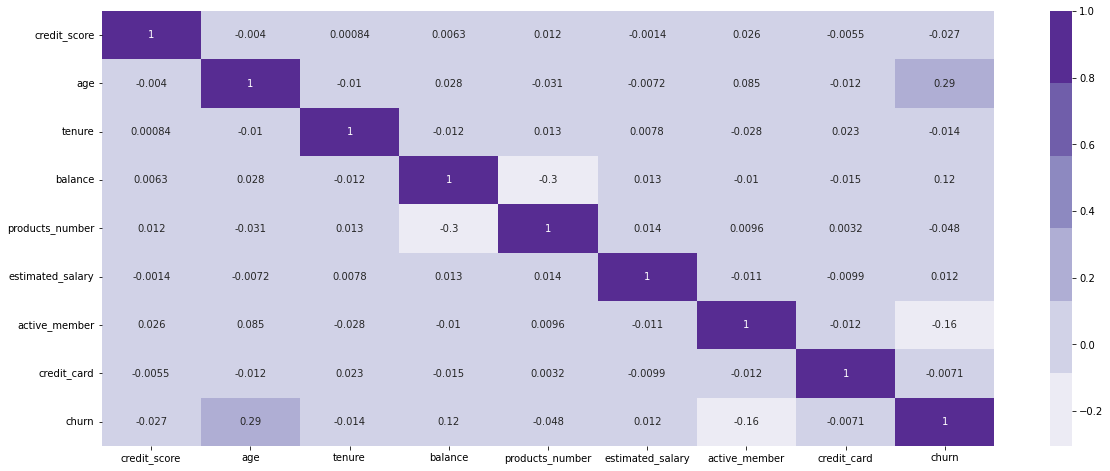

In [13]:
plt.figure(figsize=(20,8))
df_string = pd.get_dummies(df)
sns.heatmap(df[['credit_score','age','tenure','balance','products_number','estimated_salary','active_member','credit_card','churn']].corr(), cmap=sns.color_palette("Purples"), annot=True)
plt.show()

From the above heatmap we can see that:
- No numerical values are closely linked
- Churn is most related to age: 0.29
- Churn is also linked to balance: 0.12
- Non-Churn is also linked to active_members: 0.16
- Not one value from the table can be used to determine the churn rate, multiple values will need to be used

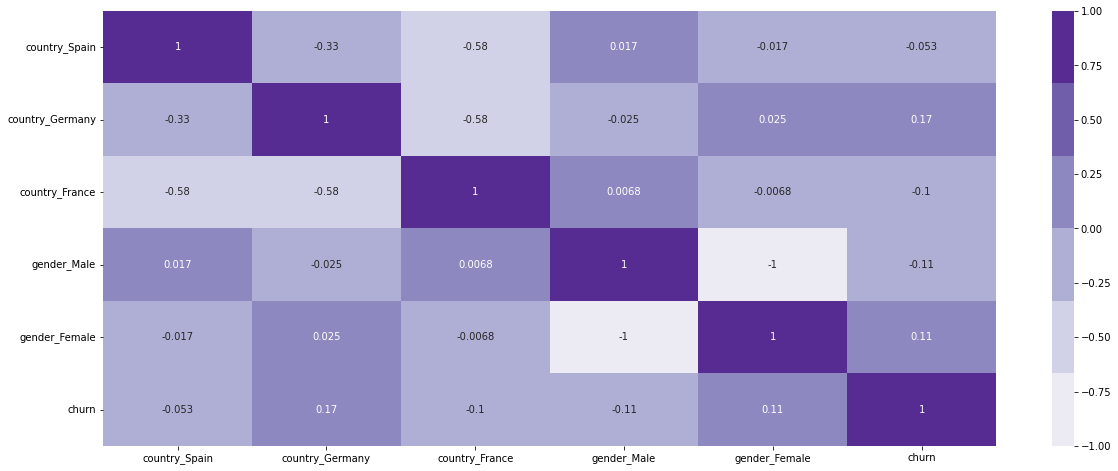

In [14]:
plt.figure(figsize=(20,8))
df_string = pd.get_dummies(df)
sns.heatmap(df_string[['country_Spain','country_Germany','country_France','gender_Male','gender_Female','churn']].corr(), cmap=sns.color_palette("Purples"), annot=True)
plt.show()

From the above heatmap we can see that:
- Germany has the highest correlation to churn being 0.17
- Females and males also have a light correlation to churn being 0.11

# Continuous data processing and visualisation

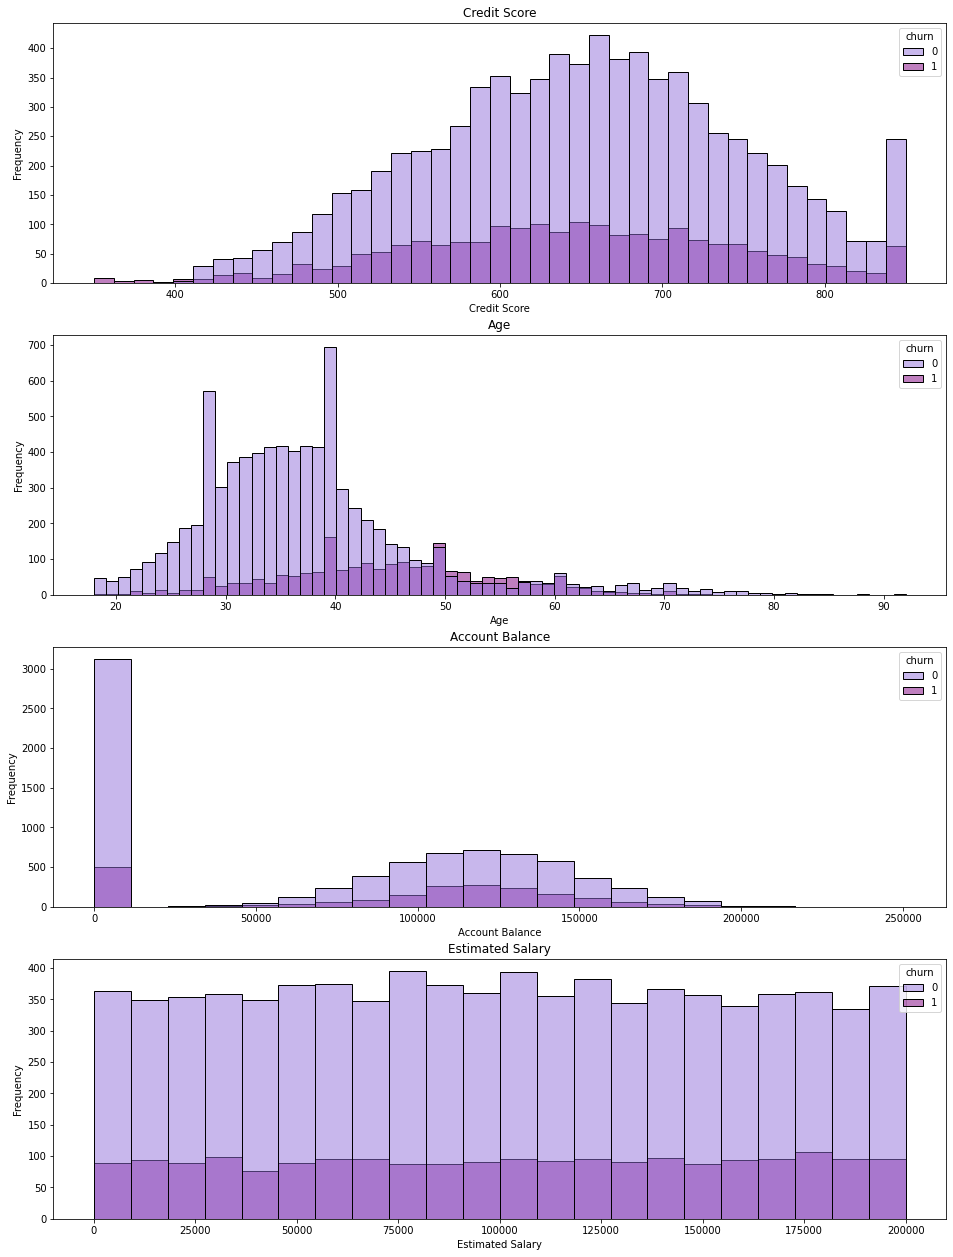

In [15]:
plt.figure(figsize=(16,22))
plt.subplot(4,1,1)
sns.histplot(x=df['credit_score'], hue=df['churn'], palette=["mediumpurple", "purple"])
plt.title('Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.subplot(4,1,2)
sns.histplot(x=df['age'], hue=df['churn'], palette=["mediumpurple", "purple"])
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.subplot(4,1,3)
sns.histplot(x=df['balance'], hue=df['churn'], palette=["mediumpurple", "purple"])
plt.title('Account Balance')
plt.xlabel('Account Balance')
plt.ylabel('Frequency')
plt.subplot(4,1,4)
sns.histplot(x=df['estimated_salary'], hue=df['churn'], palette=["mediumpurple", "purple"])
plt.title('Estimated Salary')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')
plt.show()

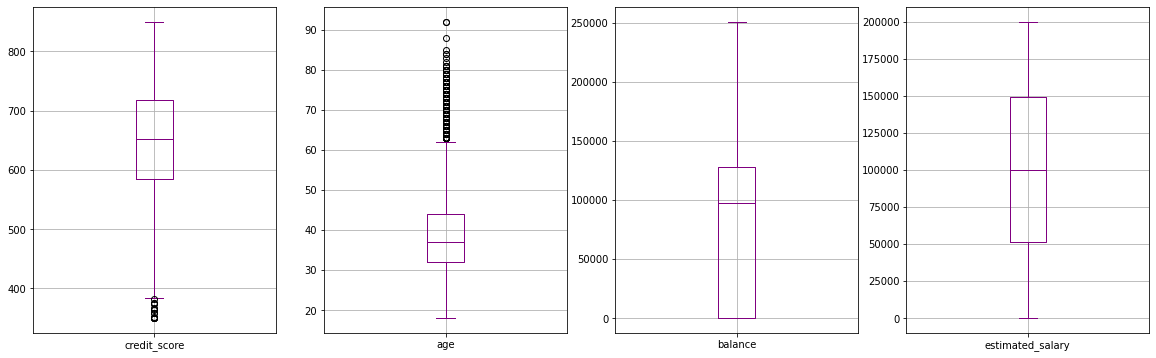

In [58]:
plt.figure(figsize=(20,6))
plt.subplot(1,4,1)
df.boxplot(column=['credit_score'], color="purple")
plt.subplot(1,4,2)
df.boxplot(column=['age'], color="purple")
plt.subplot(1,4,3)
df.boxplot(column=['balance'], color="purple")
plt.subplot(1,4,4)
df.boxplot(column=['estimated_salary'], color="purple")
plt.show()

## Getting rid of outliers

In [17]:
Q1 = df['credit_score'].quantile(0.25)
Q3 = df['credit_score'].quantile(0.75)
IQR = Q3 - Q1

filter = (df['credit_score'] >= Q1 - 1.5 * IQR) & (df['credit_score'] <= Q3 + 1.5 *IQR)
df_clean = df.loc[filter] 

Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

filter = (df['age'] >= Q1 - 1.5 * IQR) & (df['age'] <= Q3 + 1.5 *IQR)
df_clean = df.loc[filter]

In [18]:
df_clean

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


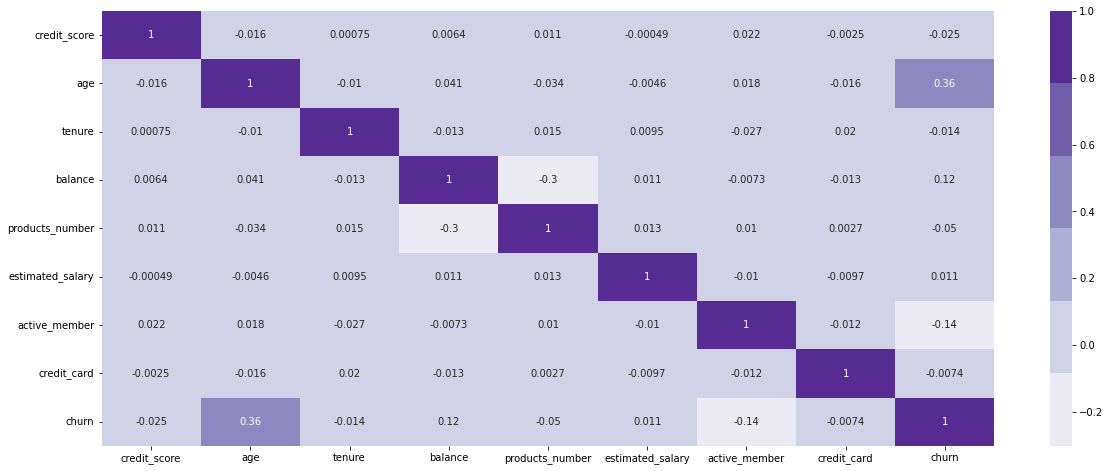

In [19]:
plt.figure(figsize=(20,8))
sns.heatmap(df_clean[['credit_score','age','tenure','balance','products_number','estimated_salary','active_member','credit_card','churn']].corr(), cmap=sns.color_palette("Purples"), annot=True)
plt.show()

From the above heatmap we can see that:
- Age correlation to churn has increased from 0.29 to 0.36
- Balance correlation to churn is the same as data that is not clean
- Active_Member correlation has decreased from 0.16 to 0.14
Overall cleaning the data was useful as the there is now a stronger correlation overall.

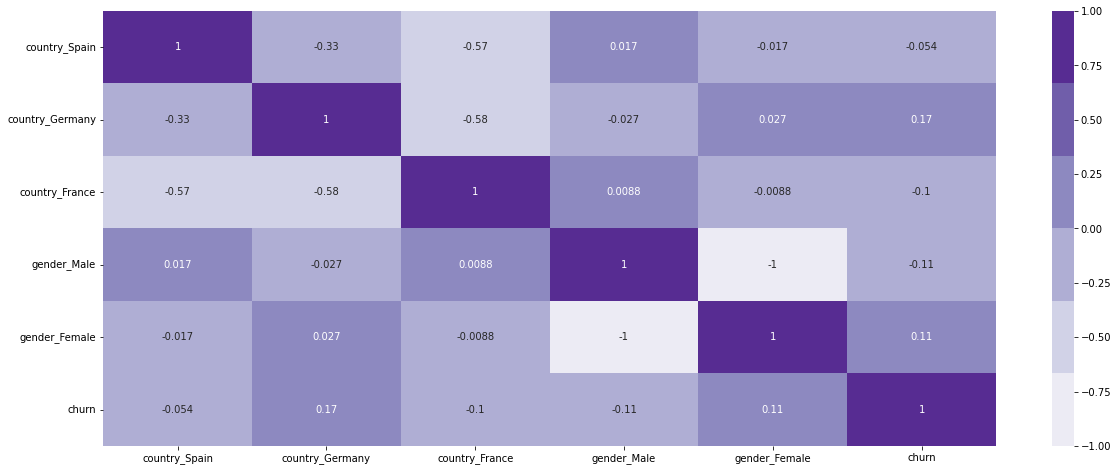

In [56]:
plt.figure(figsize=(20,8))
df_clean_string = pd.get_dummies(df_clean)
sns.heatmap(df_clean_string[['country_Spain','country_Germany','country_France','gender_Male','gender_Female','churn']].corr(), cmap=sns.color_palette("Purples"), annot=True)
plt.show()

There have been small changes to the correlation matrix above but nothing worth noting meaning that the clean data will be used going forward.

## Building the model

In [21]:
df_processed = df_clean.copy()

In [22]:
df_processed['country'] = LabelEncoder().fit_transform(df_processed['country'])
df_processed['gender'] = LabelEncoder().fit_transform(df_processed['gender'])

In [23]:
x = df_processed.drop(['customer_id', 'churn'], axis=1)
x.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [24]:
y = df_processed['churn']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [26]:
dec_tree = DecisionTreeClassifier()

In [27]:
dec_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [28]:
y_pred = dec_tree.predict(x_test)

In [29]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1527
           1       0.47      0.47      0.47       402

    accuracy                           0.78      1929
   macro avg       0.66      0.66      0.66      1929
weighted avg       0.78      0.78      0.78      1929



In [30]:
log_reg = LogisticRegression()

In [31]:
log_reg.fit(x_train, y_train)

LogisticRegression()

In [32]:
y_pred = log_reg.predict(x_test)

In [33]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1527
           1       0.56      0.13      0.21       402

    accuracy                           0.80      1929
   macro avg       0.68      0.55      0.55      1929
weighted avg       0.76      0.80      0.74      1929



##  Multiple decision trees

In [34]:
forest = RandomForestClassifier()

In [35]:
forest.fit(x_train, y_train)

RandomForestClassifier()

In [36]:
y_pred = forest.predict(x_test)

In [37]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1527
           1       0.72      0.43      0.54       402

    accuracy                           0.85      1929
   macro avg       0.80      0.69      0.73      1929
weighted avg       0.84      0.85      0.83      1929



## Analysing precision

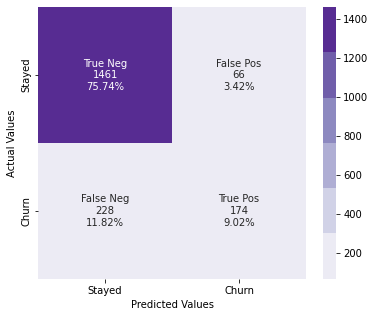

In [38]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
percentages = ["{0:.2%}".format(value) for value in cnf_matrix.flatten()/np.sum(cnf_matrix)]
names = ['True Neg','False Pos','False Neg','True Pos']
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(6,5))
ax = sns.heatmap(cnf_matrix, annot=labels, fmt='',cmap=sns.color_palette("Purples"))
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.xaxis.set_ticklabels(['Stayed', 'Churned'])
ax.yaxis.set_ticklabels(['Stayed', 'Churned'])
plt.show()

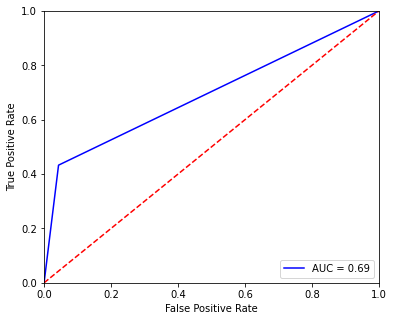

In [39]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Using SMOTE to rebalance the data

In [40]:
x,y=SMOTE().fit_resample(x,y)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [42]:
dec_tree = DecisionTreeClassifier()

In [43]:
dec_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [44]:
y_pred = dec_tree.predict(x_test)

In [45]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1545
           1       0.78      0.79      0.78      1526

    accuracy                           0.78      3071
   macro avg       0.78      0.78      0.78      3071
weighted avg       0.78      0.78      0.78      3071



In [46]:
log_reg = LogisticRegression()

In [47]:
log_reg.fit(x_train, y_train)

LogisticRegression()

In [48]:
y_pred = log_reg.predict(x_test)

In [49]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.64      0.66      1545
           1       0.65      0.69      0.67      1526

    accuracy                           0.66      3071
   macro avg       0.67      0.66      0.66      3071
weighted avg       0.67      0.66      0.66      3071



##  Multiple decision trees

In [50]:
forest = RandomForestClassifier()

In [51]:
forest.fit(x_train, y_train)

RandomForestClassifier()

In [52]:
y_pred = forest.predict(x_test)

In [53]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1545
           1       0.85      0.85      0.85      1526

    accuracy                           0.85      3071
   macro avg       0.85      0.85      0.85      3071
weighted avg       0.85      0.85      0.85      3071



## Analysing precision

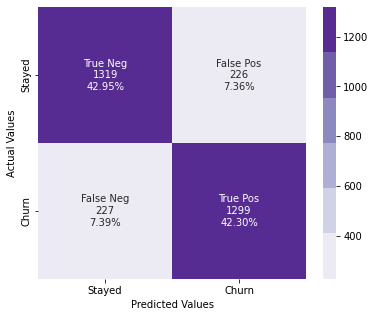

In [54]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
percentages = ["{0:.2%}".format(value) for value in cnf_matrix.flatten()/np.sum(cnf_matrix)]
names = ['True Neg','False Pos','False Neg','True Pos']
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(6,5))
ax = sns.heatmap(cnf_matrix, annot=labels, fmt='',cmap=sns.color_palette("Purples"))
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.xaxis.set_ticklabels(['Stayed', 'Churned'])
ax.yaxis.set_ticklabels(['Stayed', 'Churned'])
plt.show()

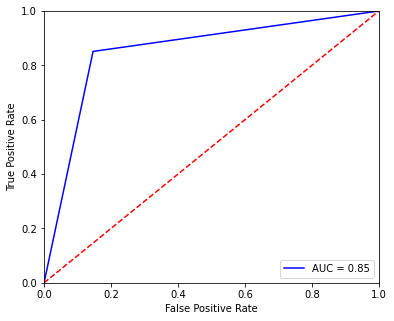

In [55]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()